In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
import os
import seaborn as sns



# Load Dataset

In [2]:
df = pd.read_csv('creditcard.csv')

# Overview of the Dataset

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111004 entries, 0 to 111003
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    111004 non-null  int64  
 1   V1      111004 non-null  float64
 2   V2      111004 non-null  float64
 3   V3      111004 non-null  float64
 4   V4      111004 non-null  float64
 5   V5      111004 non-null  float64
 6   V6      111004 non-null  float64
 7   V7      111004 non-null  float64
 8   V8      111004 non-null  float64
 9   V9      111004 non-null  float64
 10  V10     111004 non-null  float64
 11  V11     111004 non-null  float64
 12  V12     111004 non-null  float64
 13  V13     111004 non-null  float64
 14  V14     111004 non-null  float64
 15  V15     111004 non-null  float64
 16  V16     111004 non-null  float64
 17  V17     111004 non-null  float64
 18  V18     111004 non-null  float64
 19  V19     111004 non-null  float64
 20  V20     111004 non-null  float64
 21  V21     11

# Check class distribution

In [4]:
print("\nClass Distribution:")
print(df['Class'].value_counts())


Class Distribution:
Class
0.0    110764
1.0       239
Name: count, dtype: int64


# Visualization of class imbalance

In [5]:
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    """
    Plots the distribution of values for each column in the DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        nGraphShown (int): The maximum number of graphs to display.
        nGraphPerRow (int): The number of graphs to show per row.
    """
    num_columns = len(df.columns)
    nGraphShown = min(nGraphShown, num_columns)  # Cap at the number of columns in the DataFrame
    nRows = (nGraphShown + nGraphPerRow - 1) // nGraphPerRow  # Calculate number of rows needed

    plt.figure(figsize=(nGraphPerRow * 5, nRows * 4))  # Adjust figure size

    for i, column in enumerate(df.columns[:nGraphShown]):
        plt.subplot(nRows, nGraphPerRow, i + 1)
        if df[column].dtype in ['float64', 'int64']:
            df[column].hist(bins=30)
        else:
            df[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.tight_layout()

    plt.show()

# Example Usage
# Assuming `df` is your DataFrame
# plotPerColumnDistribution(df, 10, 5)

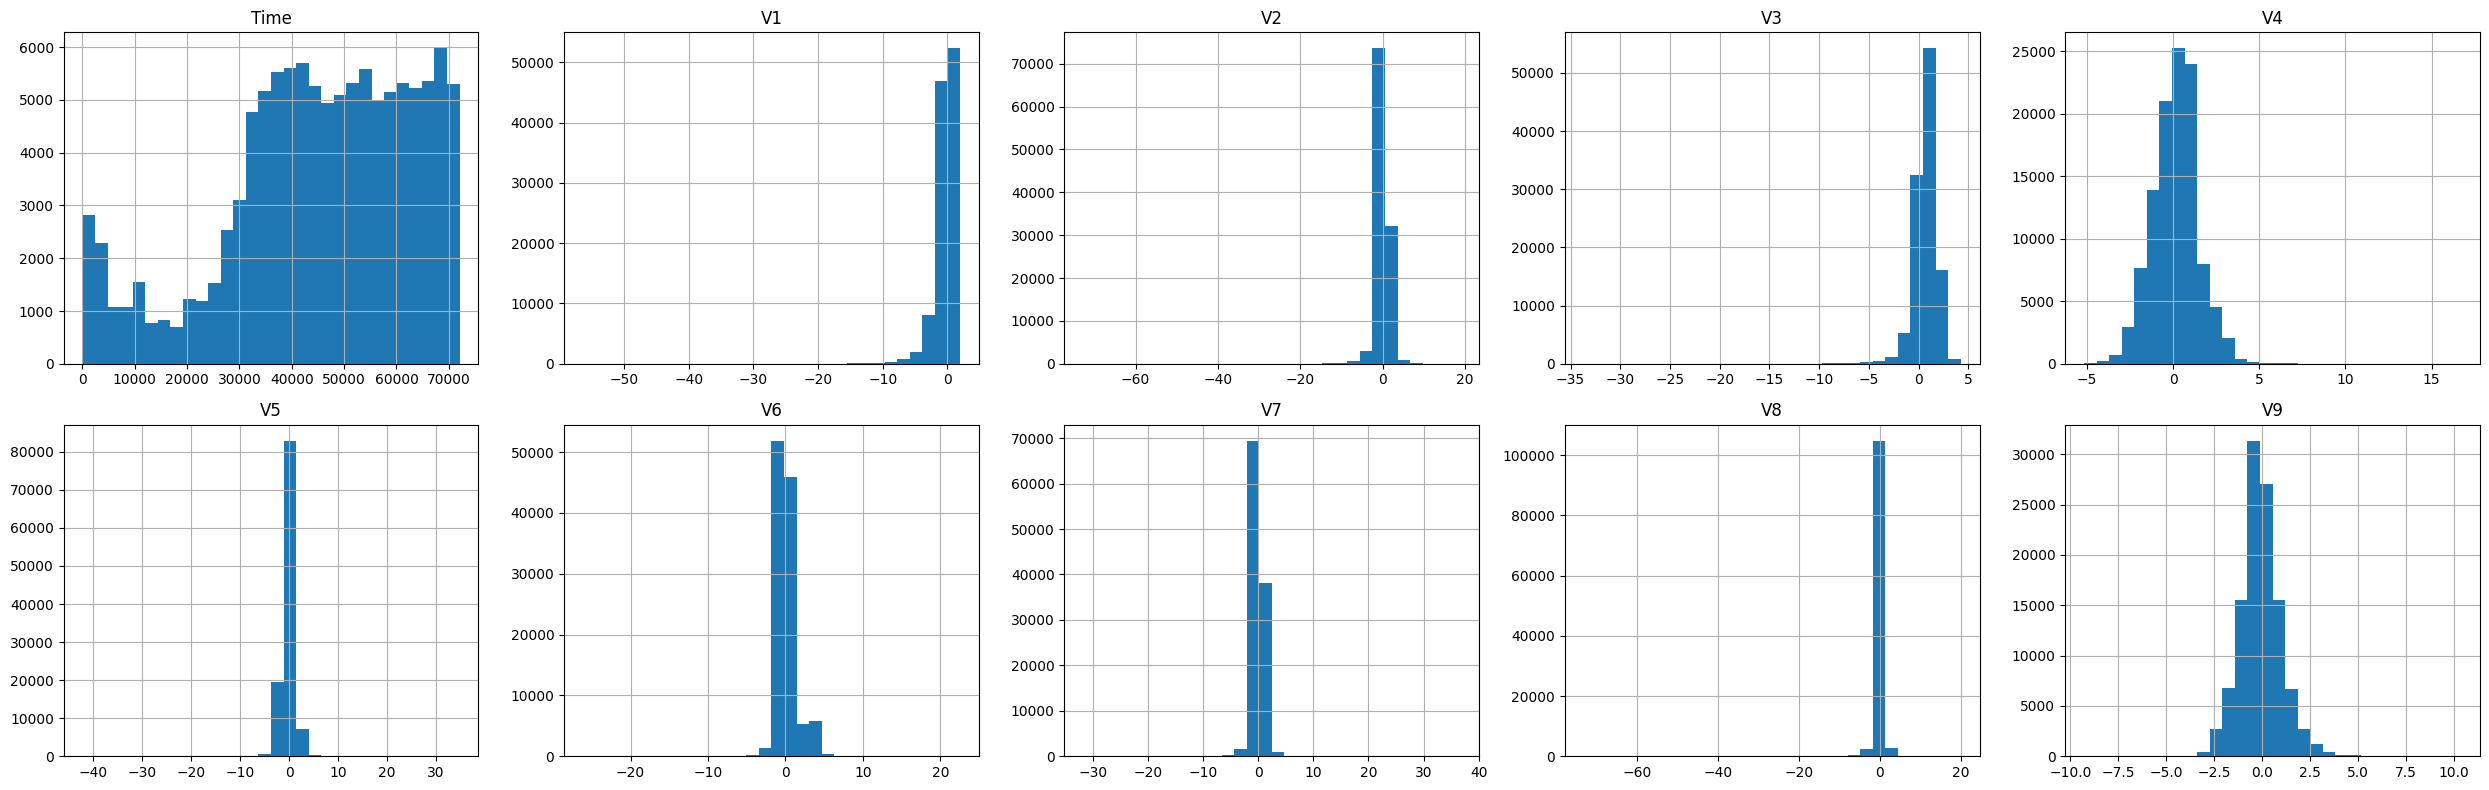

In [6]:
plotPerColumnDistribution(df, 10, 5)

# Correlation matrix:




In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plotCorrelationMatrix(df, graphWidth):
    """
    Plots the correlation matrix for the given DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        graphWidth (int): Width of the graph.
    """
    corr = df.corr()  # Compute the correlation matrix
    plt.figure(figsize=(graphWidth, graphWidth))
    heatmap = plt.matshow(corr, fignum=1, cmap='coolwarm')
    plt.colorbar(heatmap)
    ticks = np.arange(0, len(df.columns), 1)
    plt.xticks(ticks, df.columns, rotation=90)
    plt.yticks(ticks, df.columns)
    plt.title('Correlation Matrix', pad=20)
    plt.show()


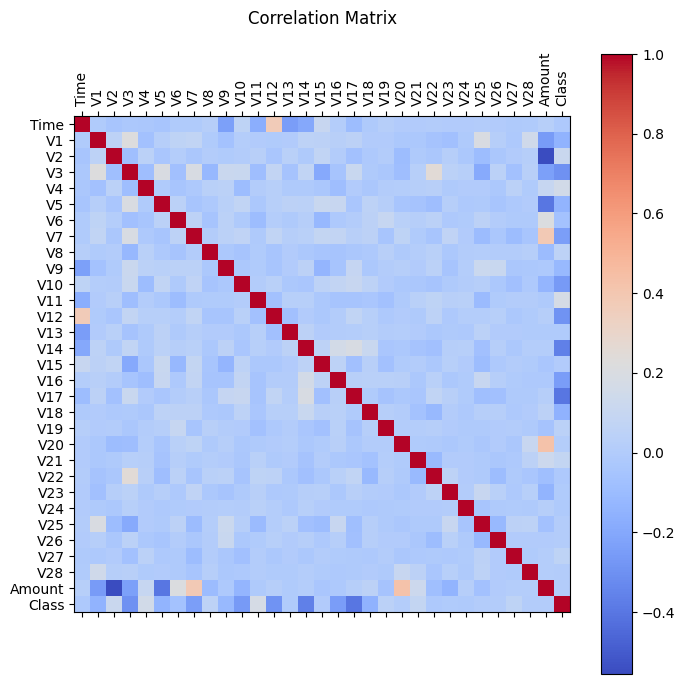

In [8]:
plotCorrelationMatrix(df, 8)

Scatter and density plots:

In [9]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

def plotScatterMatrix(df, nGraphShown, graphWidth):
    """
    Plots a scatter matrix for the given DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        nGraphShown (int): Maximum number of columns to include in the scatter matrix.
        graphWidth (int): Width of the graph.
    """
    num_columns = len(df.columns)
    nGraphShown = min(nGraphShown, num_columns)  # Cap the number of columns shown
    columns_to_plot = df.columns[:nGraphShown]

    scatter_matrix(df[columns_to_plot], figsize=(graphWidth, graphWidth), diagonal='kde')
    plt.suptitle('Scatter Matrix')
    plt.show()

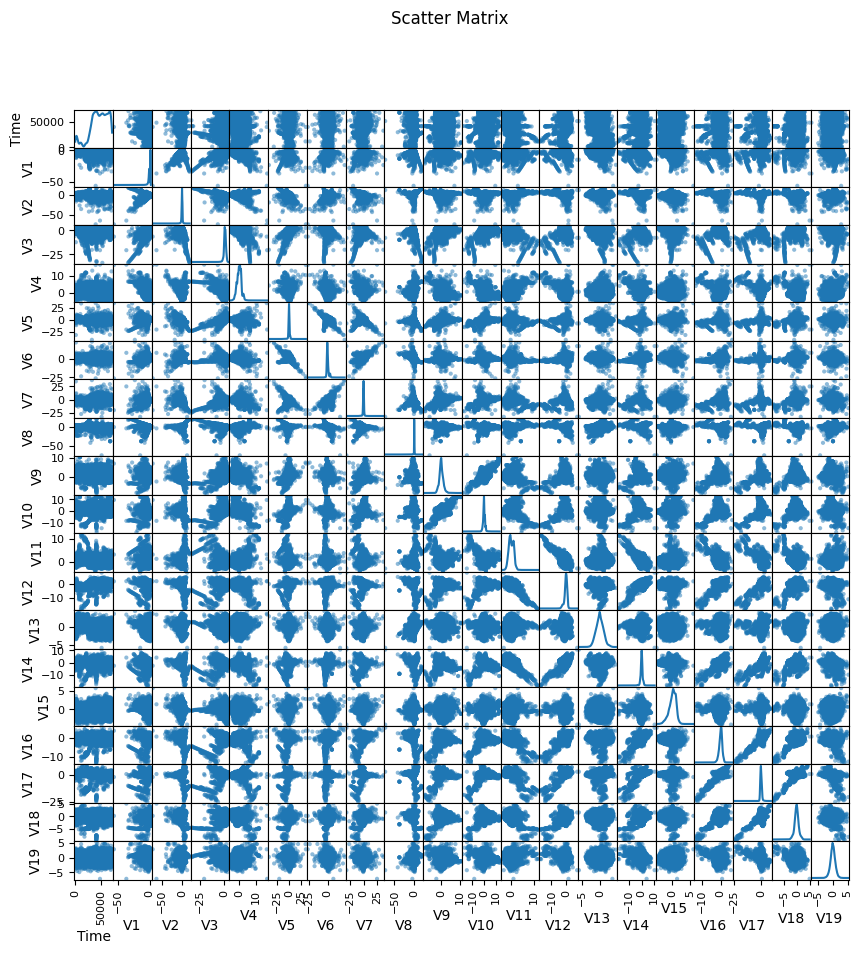

In [10]:
plotScatterMatrix(df, 20, 10)

In [11]:
print(df.columns)
if 'Time' in df.columns:
    df['Hour'] = (df['Time'] // 3600) % 24
else:
    print("Column 'Time' is not available. Skipping 'Hour' calculation.")
if 'Amount' in df.columns:
    df['Amount_log'] = np.log1p(df['Amount'])
    df.drop(['Amount'], axis=1, inplace=True)
else:
    print("Column 'Amount' is not available. Skipping log transformation.")
    df = pd.read_csv('creditcard.csv')  # Ensure the correct dataset path
print(df.head())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247

# Feature Engineering

In [14]:
print(df.columns)
df.columns = df.columns.str.strip()
print(df.head())
print(df.head())
df.rename(columns={'amount': 'Amount'}, inplace=True)
default_value = None
df.get('Amount', default_value)
default_value = 0
df.get('Amount', default_value)
df.get('Amount')



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Hour',
       'Amount_log'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895

# Standardize features

In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.drop('Class', axis=1).columns)
df_scaled['Class'] = df['Class']

# Splitting Features and Target

In [17]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Train-Test Split

In [18]:
import pandas as pd
print(pd.isnull(y).sum())  # Check the number of NaNs in y

1


In [19]:
valid_indices = ~pd.isnull(y)
X = X[valid_indices]
y = y[valid_indices]

In [ ]:
y.fillna(y.mode()[0], inplace=True)  # For classification (use the most common value)
# or
y.fillna(y.mean(), inplace=True)

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")  # Or "mean" for regression
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Logistic Regression with SMOTE

In [23]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

log_model = LogisticRegression(random_state=2, max_iter=1000)
log_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=2)

# Predictions and Evaluation (Logistic Regression)

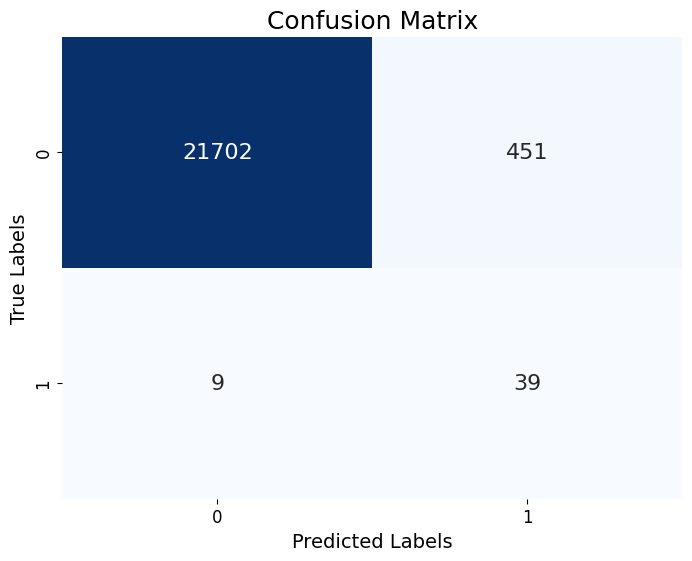

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
y_pred = log_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Evaluation:")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Logistic Regression Evaluation:

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     22153
         1.0       0.08      0.81      0.14        48

    accuracy                           0.98     22201
   macro avg       0.54      0.90      0.57     22201
weighted avg       1.00      0.98      0.99     22201

ROC-AUC Score: 0.9479848478008999


# Anomaly Detection using Isolation Forest

In [30]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.001, random_state=2)
iso_forest.fit(X_train[y_train == 0])  # Train only on legitimate transactions


IsolationForest(contamination=0.001, random_state=2)

# Predict anomalies


Anomaly Detection Evaluation (Isolation Forest):
Confusion Matrix:
 [[22137    16]
 [   36    12]]


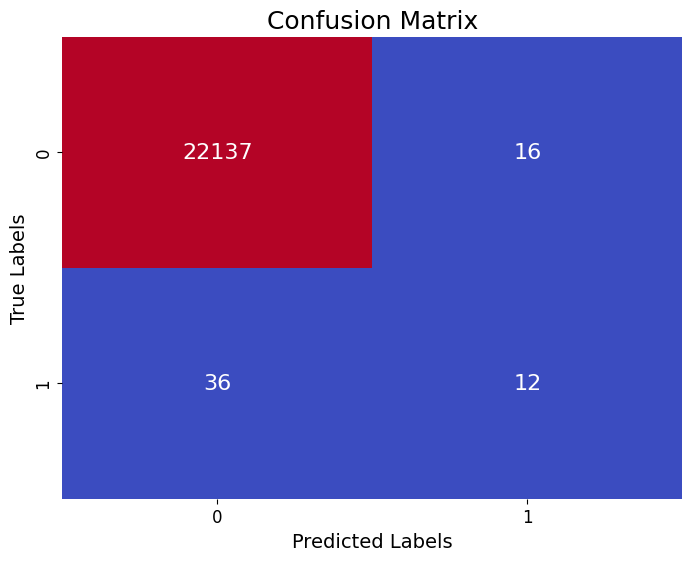


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22153
         1.0       0.43      0.25      0.32        48

    accuracy                           1.00     22201
   macro avg       0.71      0.62      0.66     22201
weighted avg       1.00      1.00      1.00     22201



In [38]:
anomalies = iso_forest.predict(X_test)
anomalies = np.where(anomalies == -1, 1, 0)  # Mark anomalies as frauds

print("\nAnomaly Detection Evaluation (Isolation Forest):")
cm = confusion_matrix(y_test, anomalies)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print("\nClassification Report:\n", classification_report(y_test, anomalies))

# Plot ROC Curve

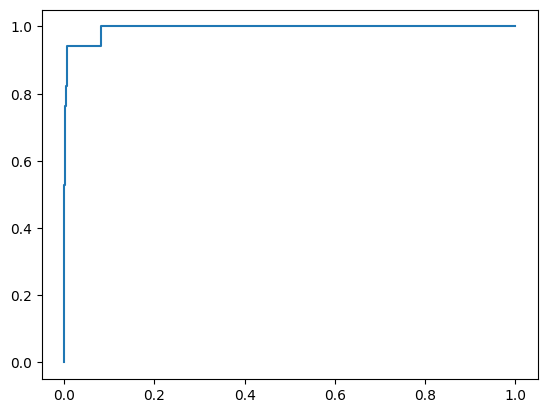

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))


# No probabilities for Isolation Forest; assume output from predicted anomalies

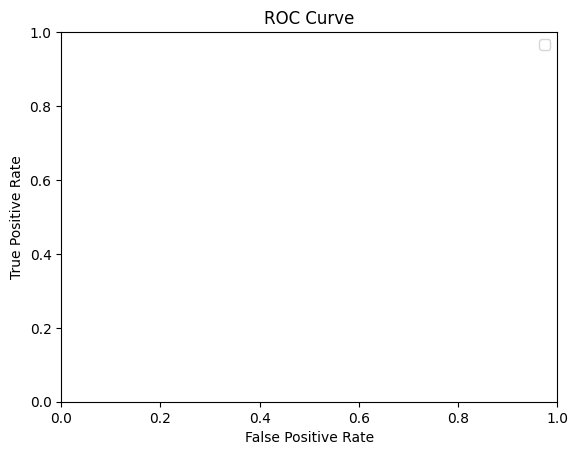

In [ ]:
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# VGG19

In [39]:
# Importing Libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical


# Overview of the Dataset

In [40]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111004 entries, 0 to 111003
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        111004 non-null  int64  
 1   V1          111004 non-null  float64
 2   V2          111004 non-null  float64
 3   V3          111004 non-null  float64
 4   V4          111004 non-null  float64
 5   V5          111004 non-null  float64
 6   V6          111004 non-null  float64
 7   V7          111004 non-null  float64
 8   V8          111004 non-null  float64
 9   V9          111004 non-null  float64
 10  V10         111004 non-null  float64
 11  V11         111004 non-null  float64
 12  V12         111004 non-null  float64
 13  V13         111004 non-null  float64
 14  V14         111004 non-null  float64
 15  V15         111004 non-null  float64
 16  V16         111004 non-null  float64
 17  V17         111004 non-null  float64
 18  V18         111004 non-null  float64
 19  V1

# Check class distribution

In [41]:
print("\nClass Distribution:")
print(df['Class'].value_counts())


Class Distribution:
Class
0.0    110764
1.0       239
Name: count, dtype: int64


# Visualization of class imbalance

In [42]:
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    """
    Plots the distribution of values for each column in the DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        nGraphShown (int): The maximum number of graphs to display.
        nGraphPerRow (int): The number of graphs to show per row.
    """
    num_columns = len(df.columns)
    nGraphShown = min(nGraphShown, num_columns)  # Cap at the number of columns in the DataFrame
    nRows = (nGraphShown + nGraphPerRow - 1) // nGraphPerRow  # Calculate number of rows needed

    plt.figure(figsize=(nGraphPerRow * 5, nRows * 4))  # Adjust figure size

    for i, column in enumerate(df.columns[:nGraphShown]):
        plt.subplot(nRows, nGraphPerRow, i + 1)
        if df[column].dtype in ['float64', 'int64']:
            df[column].hist(bins=30)
        else:
            df[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.tight_layout()

    plt.show()

# Example Usage
# Assuming `df` is your DataFrame
# plotPerColumnDistribution(df, 10, 5)

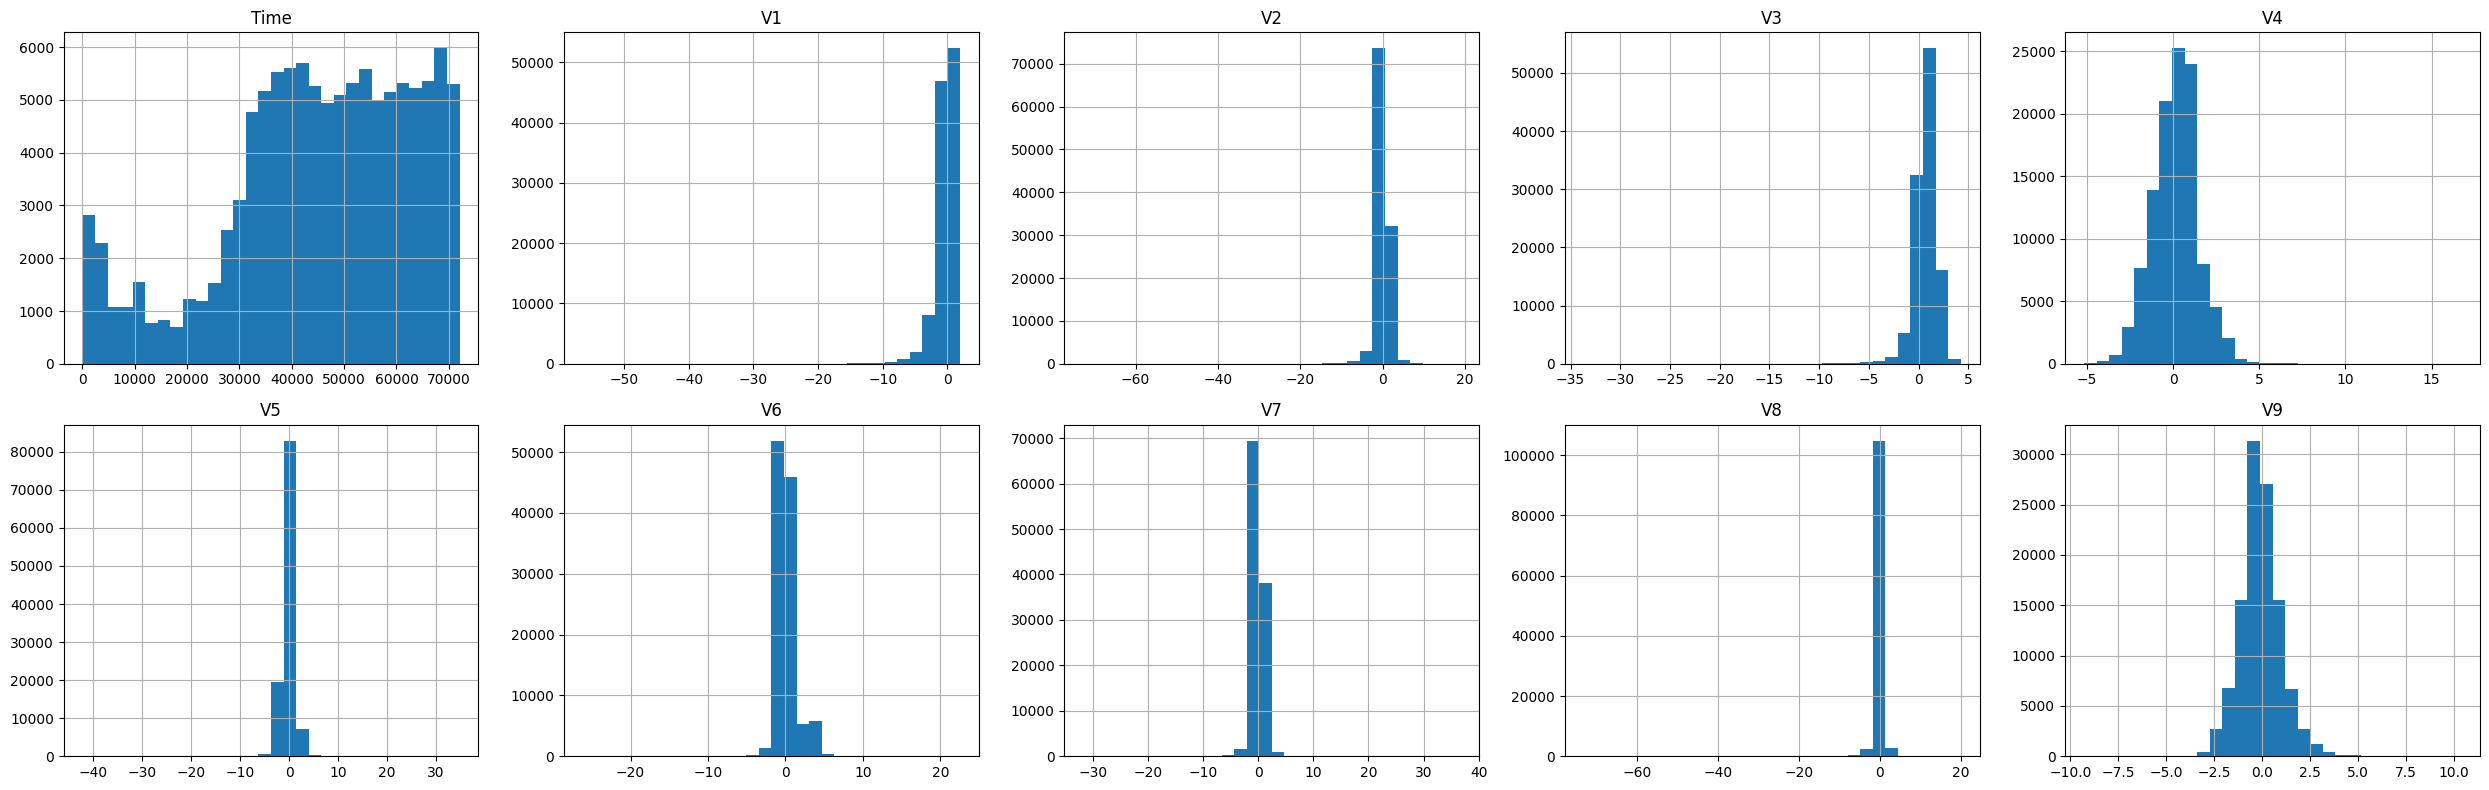

In [43]:
plotPerColumnDistribution(df, 10, 5)

# Feature Engineering

In [44]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1))
labels = df['Class']

# Reshape features to image-like input (e.g., 28x28 grid for simplicity)

In [45]:
image_size = 28  # Assuming each sample is reshaped into a 28x28 "image"
reshaped_features = np.zeros((scaled_features.shape[0], image_size, image_size, 1))
for i in range(scaled_features.shape[0]):
    reshaped_features[i, :, :, 0] = np.pad(scaled_features[i], (0, image_size**2 - len(scaled_features[i]))) \
        .reshape((image_size, image_size))

# Split into train/test sets

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
if np.any(np.isnan(labels)):
    valid_indices = ~np.isnan(labels)
    reshaped_features = reshaped_features[valid_indices]
    labels = labels[valid_indices]
X_train, X_test, y_train, y_test = train_test_split(
    reshaped_features, labels, test_size=0.2, stratify=labels, random_state=42
)

# Convert labels to categorical

In [48]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# VGG19 Pretrained Model for Feature Extraction

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST images are grayscale (28x28), so expand dimensions to make them RGB (28x28x3)
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

# Resize images to 32x32
x_train_resized = tf.image.resize(x_train, (32, 32))
x_test_resized = tf.image.resize(x_test, (32, 32))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [50]:
from tensorflow.keras.applications import VGG19

# Define VGG19 model with resized input shape
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in vgg19.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Add Custom Layers for Fraud Detection

In [51]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Define the input image size
image_size = 32

# Create the Sequential model
model = Sequential()

# Add a Conv2D layer to convert 1-channel to 3-channel input
model.add(Conv2D(3, (3, 3), padding="same", input_shape=(image_size, image_size, 1)))

# Add the VGG19 model as a feature extractor
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
model.add(vgg19)

# Add other layers on top of VGG19
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Adjust the number of classes as needed

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 1, 1, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,158,312 (76.90 MB)

 Trainable params: 20,158,312 (76.90 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Expand grayscale images to have 3 channels (RGB)
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

# Resize images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Normalize the images
x_train = tf.cast(x_train, tf.float32) / 255.0
x_test = tf.cast(x_test, tf.float32) / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define the Sequential model
model = Sequential()

# Add a Conv2D layer to convert 1-channel to 3-channel input (not strictly needed anymore, but kept for compatibility)
model.add(Conv2D(3, (3, 3), padding="same", input_shape=(32, 32, 3)))

# Add the VGG19 model as a feature extractor
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model.add(vgg19)

# Add custom layers on top of VGG19
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for MNIST

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5659s 4s/step - accuracy: 0.1089 - loss: 2.3899 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 2/10
 717/1500 ━━━━━━━━━━━━━━━━━━━━ 47:45 4s/step - accuracy: 0.1074 - loss: 2.3021

# Evaluate Model

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

In [ ]:
print("\nCNN with VGG19 Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Anomaly Detection (Using Unsupervised Autoencoders)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Autoencoder Model for Anomaly Detection

In [ ]:
input_dim = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_train_flat = X_train.reshape(X_train.shape[0], input_dim)
X_test_flat = X_test.reshape(X_test.shape[0], input_dim)

In [ ]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

In [ ]:

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder on Legitimate Transactions Only

In [ ]:
autoencoder.fit(X_train_flat[y_train == 0], X_train_flat[y_train == 0],
                epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

# Reconstruction Error

In [ ]:
reconstructions = autoencoder.predict(X_test_flat)
mse = np.mean(np.power(X_test_flat - reconstructions, 2), axis=1)

# Set Threshold for Anomalies

In [ ]:
print("\nAnomaly Detection Evaluation (Autoencoder):")
print("Confusion Matrix:\n", confusion_matrix(y_test, anomalies))
print("\nClassification Report:\n", classification_report(y_test, anomalies))